# Polynomial shift function

This notebook uses a polynomial shift function to make several test functions and their first N derivatives continuous at the domain boundaries. This accelerates the convergence of their respective Fourier series and mitigates Gibb's phenomenon.

## Imports

In [1]:
import numpy as np  
import scipy
import matplotlib.pyplot as plt 
import spectral_derivative as sd 


## Test continuity of derivatives after shift using FFT

In [2]:
x, dx = sd.computeX(0, 2, 100)

def func(x, derivative_order=0): 
    return np.real((1j*10)**derivative_order*np.exp(1j*10*x))

forg = func(x)

N = 3
N_derivative = 8

B, poly = sd.getShiftFunction(x, forg, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, lb = 0, rb = 0, chop = False, N = N)
hom  = forg - B[0]
fhat = scipy.fft.fft(hom) 

fig, ax = plt.subplots(N_derivative, 1, sharex=True, figsize=(4,N_derivative*3)) 
fig.suptitle(f"Smoothing order = {N}")
for i in range(N_derivative): 
    k    = sd.computeK(fhat, dx, sd.PERIODIC)
    frec = scipy.fft.ifft(fhat * (1j*k)**i)
    frec = frec
    reco = poly(x, i)
    sumo = frec + reco 

    fref = func(x, i) 
    ax[i].set_title(f"Derivative order {i} error {np.mean(np.abs(sumo-fref)):3.3e}")
    ax[i].plot(x, sumo, label="sum") 
    ax[i].plot(x, fref, label="ref") 
    
plt.savefig(f"poly_order_{N}.png")
plt.close()

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


## Test decay of Fourier coefficients

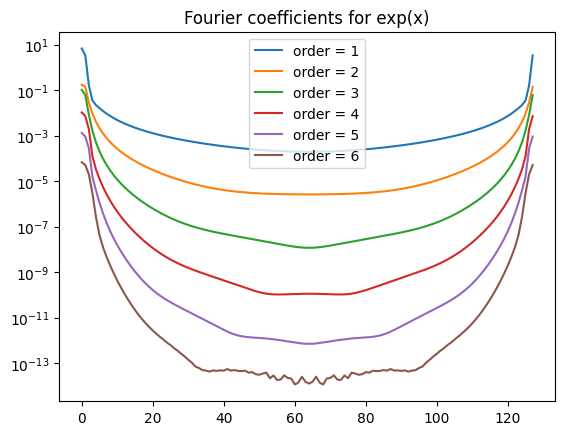

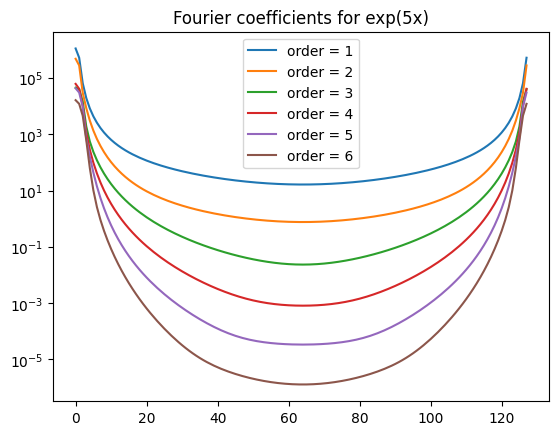

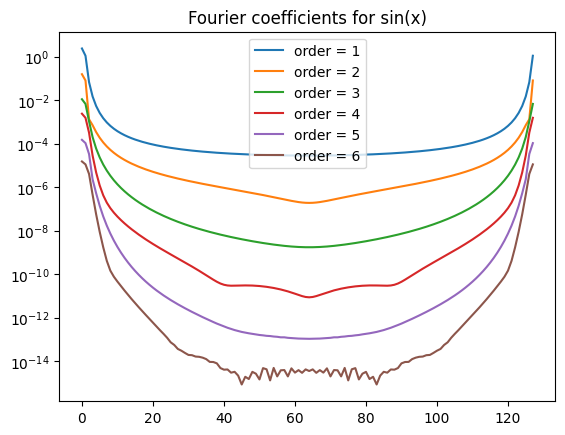

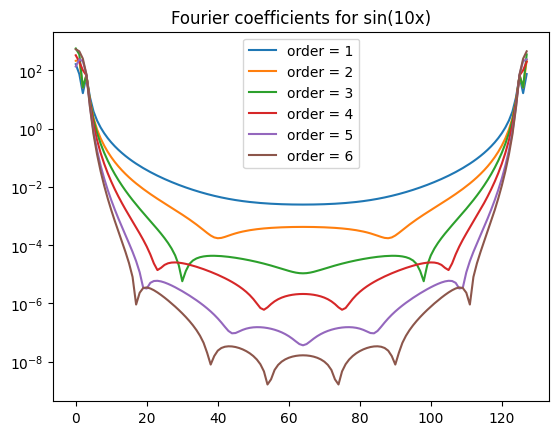

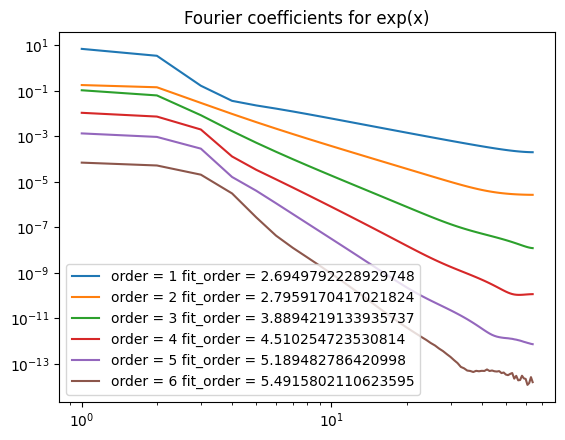

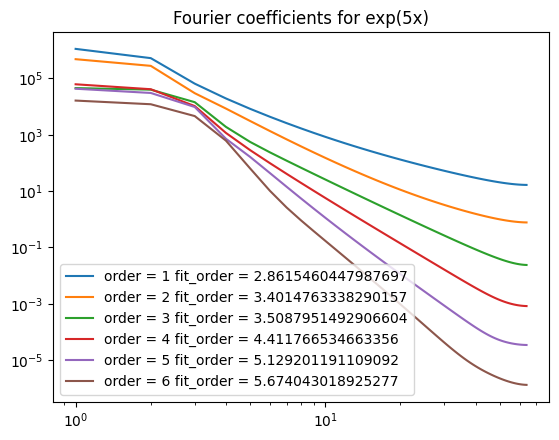

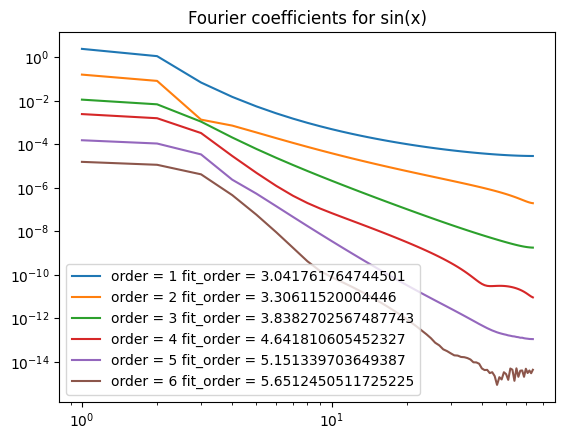

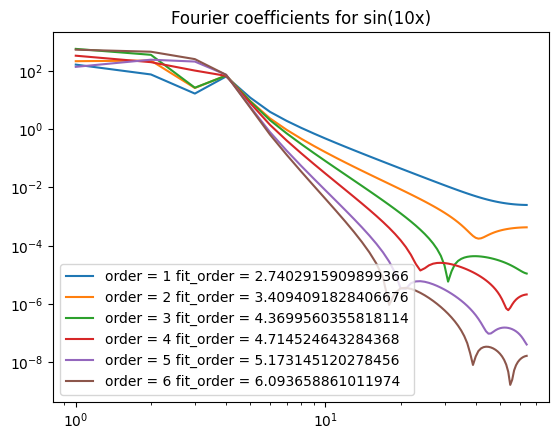

In [3]:
x = np.linspace(0, 2, 128)
fs = [np.exp(x), np.exp(5*x), np.sin(x), np.sin(x*10)]
ns = ["exp(x)", "exp(5x)", "sin(x)", "sin(10x)"]

for f, n in zip(fs, ns): 
    plt.title(f"Fourier coefficients for {n}") 
    plt.yscale("log") 
    for order in [1, 2, 3, 4, 5, 6]: 
        B, poly = sd.getShiftFunction(x, f, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, lb = 0, rb = 0, chop = False, N = order)
        hom = f - B[0]
        fhat = scipy.fft.fft(hom) 
        plt.plot(np.abs(fhat), label=f"order = {order}") 
    plt.legend()
    plt.show() 


for f, n in zip(fs, ns): 
    plt.title(f"Fourier coefficients for {n}") 
    for order in [1, 2, 3, 4, 5, 6]: 
        B, poly = sd.getShiftFunction(x, f, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, lb = 0, rb = 0, chop = False, N = order)
        hom = f - B[0]
        fhat = scipy.fft.fft(hom) 
        y    = np.abs(fhat)[0:int(len(fhat)/2)]
        r    = np.arange(1, len(y)+1)
        #print(len(y), len(r))
        def fitfunc(x, beta): 
            return np.log(y[0]) + beta * np.log(x)
        coeff, cov = scipy.optimize.curve_fit(fitfunc, r, np.log(y)) 
        #print(coeff)
        plt.loglog(r, y, label=f"order = {order} fit_order = {np.abs(coeff[0])}") 
        #plt.loglog(r, np.exp(fitfunc(r, coeff[0])), label=f"fit with {y[0]} * x ** {coeff[0]}") 
    plt.legend()
    plt.show() 

## Use bell to make function periodic

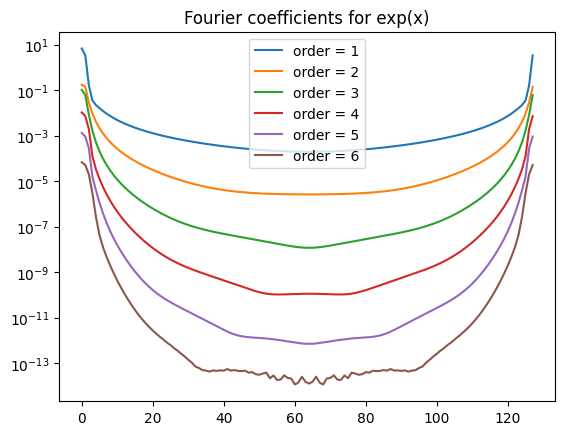

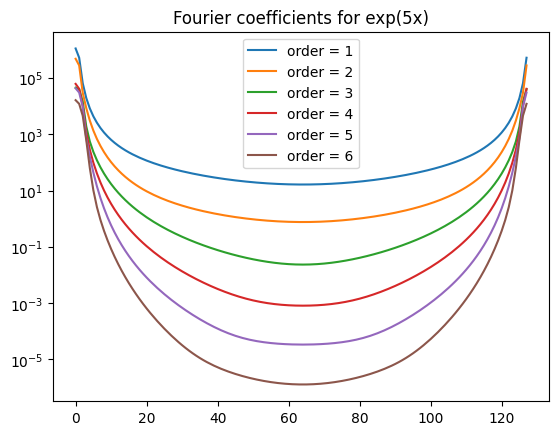

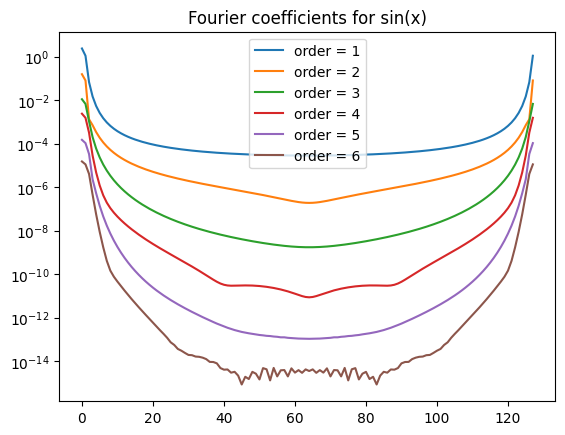

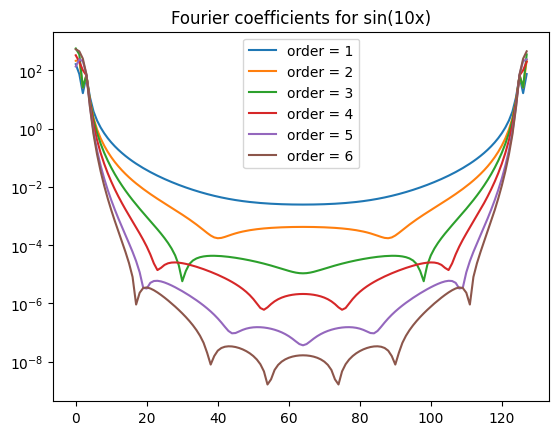

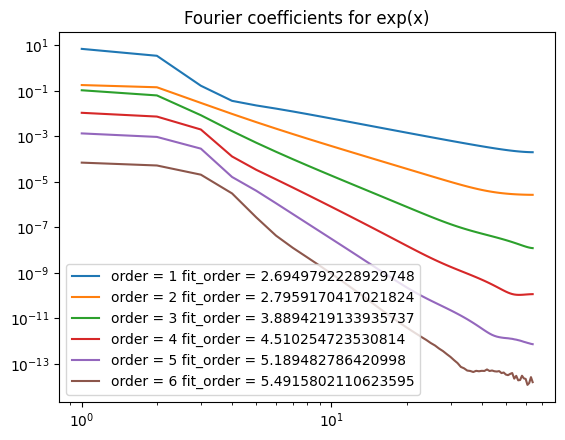

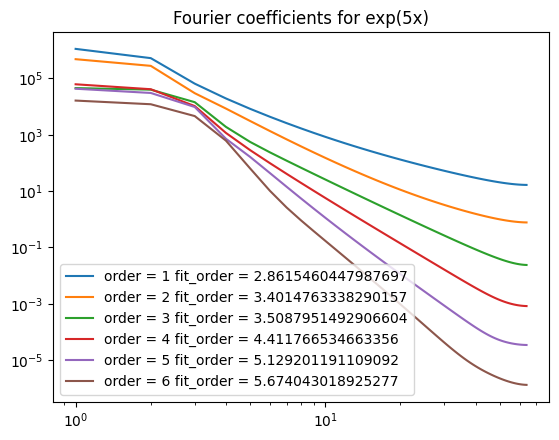

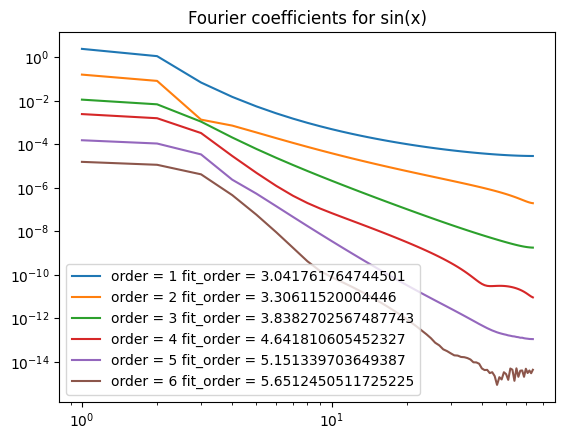

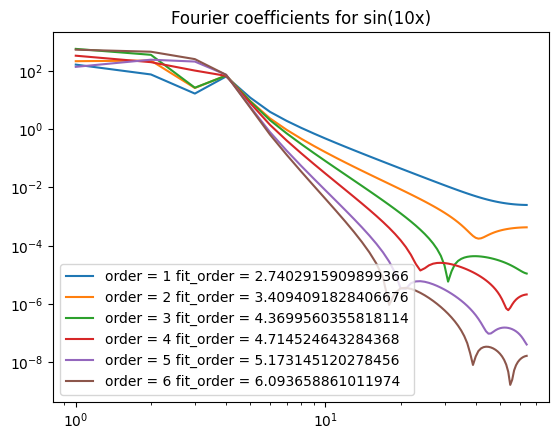

In [4]:
x = np.linspace(0, 2, 128)
fs = [np.exp(x), np.exp(5*x), np.sin(x), np.sin(x*10)]
ns = ["exp(x)", "exp(5x)", "sin(x)", "sin(10x)"]

for f, n in zip(fs, ns): 
    plt.title(f"Fourier coefficients for {n}") 
    plt.yscale("log") 
    for order in [1, 2, 3, 4, 5, 6]: 
        B, poly = sd.getShiftFunction(x, f, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, lb = 0, rb = 0, chop = False, N = order)
        hom = f - B[0]
        fhat = scipy.fft.fft(hom) 
        plt.plot(np.abs(fhat), label=f"order = {order}") 
    plt.legend()
    plt.show() 


for f, n in zip(fs, ns): 
    plt.title(f"Fourier coefficients for {n}") 
    for order in [1, 2, 3, 4, 5, 6]: 
        B, poly = sd.getShiftFunction(x, f, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, lb = 0, rb = 0, chop = False, N = order)
        hom = f - B[0]
        fhat = scipy.fft.fft(hom) 
        y    = np.abs(fhat)[0:int(len(fhat)/2)]
        r    = np.arange(1, len(y)+1)
        #print(len(y), len(r))
        def fitfunc(x, beta): 
            return np.log(y[0]) + beta * np.log(x)
        coeff, cov = scipy.optimize.curve_fit(fitfunc, r, np.log(y)) 
        #print(coeff)
        plt.loglog(r, y, label=f"order = {order} fit_order = {np.abs(coeff[0])}") 
        #plt.loglog(r, np.exp(fitfunc(r, coeff[0])), label=f"fit with {y[0]} * x ** {coeff[0]}") 
    plt.legend()
    plt.show() 

array([2.25131245e-16, 4.46862933e-16, 2.22338096e-16, 2.22191508e-16,
       4.61147324e-17, 1.15478013e-17, 2.24090692e-16, 1.50325679e-16,
       2.31336982e-16, 2.35170126e-16, 2.26379798e-16, 4.53386314e-16,
       2.34009891e-16, 2.53628147e-16, 2.23481091e-16, 2.84634397e-16,
       2.34009891e-16, 4.44127076e-16, 1.14202629e-17, 2.22191508e-16,
       2.83293358e-16, 2.43308411e-16, 2.36292052e-16, 5.32458673e-16,
       9.39641883e-18, 4.52932674e-16, 4.46272599e-16, 4.50409278e-16,
       1.83591568e-17, 4.44239325e-16, 2.52980507e-17, 4.44239325e-16])

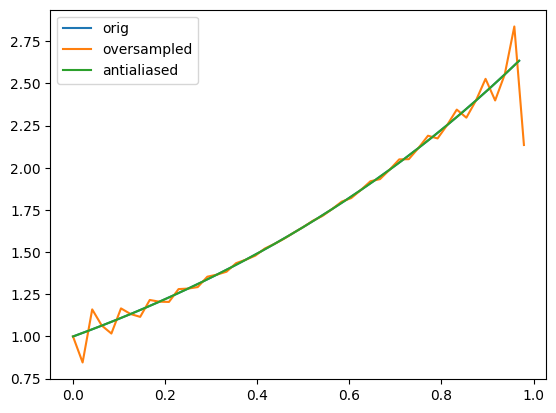

In [23]:
N = 32
M = int(3*N/2)
x = np.linspace(0, 1, N+1)[:-1]
xr= np.linspace(0, 1, M+1)[:-1]

def func(x): 
    return np.exp(x)
f = func(x) 
fhat = scipy.fft.fft(f, norm="forward")
fpad = np.concatenate([fhat[:int(N/2)], np.zeros(M-N), fhat[int(N/2):]])
fr = scipy.fft.ifft(fpad, norm="forward")

fhat = scipy.fft.fft(fr, norm="forward") 
fhat = np.concatenate([fhat[:int(N/2)], fhat[M - int(N/2):]])
fs   = scipy.fft.ifft(fhat, norm="forward") 
plt.plot(x,f, label="orig")
plt.plot(xr, fr, label="oversampled") 
plt.plot(x, fs, label="antialiased") 
plt.legend()
np.abs(func(x)-fs)

In [31]:
x = np.linspace(0, 1, 100)
y = x
def fitfunc(x, alpha, beta): 
    return alpha*x**beta
coeff, cov = scipy.optimize.curve_fit(fitfunc, x, y)

In [32]:
coeff

array([1., 1.])